## T. Martz-Oberlander, 2015-11-12, CO2 and Speed of Sound
### Formatting ENVIRONMENTAL CONDITIONS pipe organ data for Python operations

NOTE: Here, pitch and frequency are used interchangeably to signify the speed of sound from organ pipes.

The entire script looks for mathematical relationships between CO2 concentration changes and pitch changes from a pipe organ. This script uploads, cleans data and organizes new dataframes, creates figures, and performs statistical tests on the relationships between variable CO2 and frequency of sound from a note played on a pipe organ.

This uploader script:

1) Uploads CO2, temp, and RH data files;

2) Munges it (creates a Date Time column for the time stamps), establishes column contents as floats;

3) Calculates expected frequency, as per Cramer's equation;

4) Imports output from pitch_data.py script, the dataframe with measured frequency;

5) Plots expected frequency curve, CO2 (ppm) curve, and measured pitch points in a figure.

[  Here I pursue data analysis route 1 (as mentionted in my organ_pitch/notebook.md file), which involves comparing one pitch dataframe with one dataframe of environmental characteristics taken at one sensor location. Both dataframes are compared by the time of data recorded. ]





In [1]:
# I import useful libraries (with functions) so I can visualize my data
# I use Pandas because this dataset has word/string column titles and I like the readability features of commands and finish visual products that Pandas offers

import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

%matplotlib inline

#I want to be able to easily scroll through this notebook so I limit the length of the appearance of my dataframes 
from pandas import set_option
set_option('display.max_rows', 10)


##Uploaded RH and temp data into Python¶


First I upload my data set(s). I am working with environmental data from different locations in the church at differnet dates. Files include: environmental characteristics (CO2, temperature (deg C), and relative humidity (RH) (%) measurements). 

I can discard the CO2_2 column values since they are false measurements logged from an empty input jack in the CO2 HOBOWare ^(r) device. 

In [12]:
#I import a temp and RH data file
env=pd.read_table('../Data/CO2May.csv', sep=',')

#assigning columns names
env.columns=[['test', 'time','temp C', 'RH %', 'CO2_1', 'CO2_2']]

#I display my dataframe
env

,test,time,temp C,RH %,CO2_1,CO2_2
0,1,04/17/10 11:00:00 AM,20.650,35.046,452.4,689.9
1,2,04/17/10 11:02:00 AM,20.579,35.105,450.5,677.0
2,3,04/17/10 11:04:00 AM,20.507,35.229,450.5,663.6
3,4,04/17/10 11:06:00 AM,20.460,35.291,448.7,652.0
4,5,04/17/10 11:08:00 AM,20.412,35.352,442.0,641.0
...,...,...,...,...,...,...
10853,10854,2005-02-10 12:46,21.581,44.604,501.2,483.5
10854,10855,2005-02-10 12:48,21.581,44.604,504.3,482.9
10855,10856,2005-02-10 12:50,21.581,44.604,503.7,482.3
10856,10857,2005-02-10 12:52,21.604,44.575,503.1,481.7


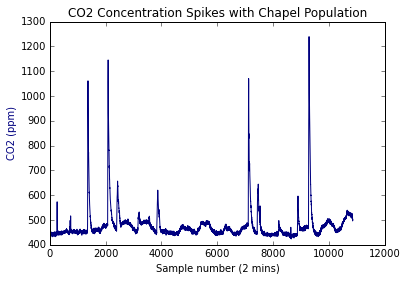

SyntaxError: 'return' outside function (<ipython-input-48-061d800138c8>, line 10)

In [48]:
#Plot CO2 

plt.plot(env['CO2_1'], color='navy')

plt.title('CO2 Concentration Spikes with Chapel Population')
plt.ylabel('CO2 (ppm)', color='navy')
plt.xlabel('Sample number (2 mins)')
plt.show()
plt.savefig('CO2_figure.pdf')
return(fig)


In [3]:
#change data time variable to actual values of time. 
env['time']= pd.to_datetime(env['time'])

#print the new table and the type of data. 
print(env)

env.dtypes

        test                time  temp C    RH %  CO2_1  CO2_2
0          1 2010-04-17 11:00:00  20.650  35.046  452.4  689.9
1          2 2010-04-17 11:02:00  20.579  35.105  450.5  677.0
2          3 2010-04-17 11:04:00  20.507  35.229  450.5  663.6
3          4 2010-04-17 11:06:00  20.460  35.291  448.7  652.0
4          5 2010-04-17 11:08:00  20.412  35.352  442.0  641.0
...      ...                 ...     ...     ...    ...    ...
10853  10854 2005-02-10 12:46:00  21.581  44.604  501.2  483.5
10854  10855 2005-02-10 12:48:00  21.581  44.604  504.3  482.9
10855  10856 2005-02-10 12:50:00  21.581  44.604  503.7  482.3
10856  10857 2005-02-10 12:52:00  21.604  44.575  503.1  481.7
10857  10858 2005-02-10 12:54:00  21.604  44.575  498.8  480.5

[10858 rows x 6 columns]


test               int64
time      datetime64[ns]
temp C           float64
RH %             float64
CO2_1            float64
CO2_2            float64
dtype: object

##Next
##1. Create a function for expected pitch (frequency of sound waves) from CO2 data
##2. Add expected_frequency to dataframe


### Calculated pitch from CO2 levels

Here I use Cramer's equation for frequency of sound from CO2 concentration (1992). 

freq = a0 + a1(T) + ... + (a9 +...) +... + a14(xc^2)
where xc is the mole fraction of CO2 and T is temperature. Full derivation of these equations can be found in the "Doc" directory.

I will later plot measured pitch (frequency) data points from my "pitch" data frame on top of these calculated frequency values for comparison.

In [4]:
#Here I am trying to create a function for the above equation. 
#I want to plug in each CO2_ave value for a time stamp (row) from the "env" data frame above. 

#define coefficients (Cramer, 1992)
a0 = 331.5024
#a1 = 0.603055
#a2 = -0.000528
a9 = -(-85.20931) #need to account for negative values
#a10 = -0.228525
a14 = 29.179762

#xc =  CO2 values from dataframe


In [7]:
#test function
def test_cramer():
    assert a0 + ((a9)*400)/100 + a14*((400/1000000)**2) == 672.33964466, 'Equation failure'
    return()

test_cramer()

AssertionError: Equation failure

In [21]:
#This function also converts ppm to mole fraction (just quantity as a proportion of total)
def cramer(data):
    '''Calculate pitch from CO2_1 concentration'''
 
    calc_freq = a0 + ((a9)*data)/100 + a14*((data/1000000)**2)
 
    return(calc_freq)

In [ ]:
#run the cramer values for the calculated frequency 
#calc_freq = cramer(env['calc_freq'])

In [ ]:
#define the new column as the output of the cramer function
#env['calc_freq'] = calc_freq

In [16]:
#Run the function for the input column (CO2 values)
env['calc_freq'] = cramer(env['CO2_1'])

cramer(env['CO2_1'])

0        716.989324
1        715.370347
2        715.370347
3        713.836580
4        708.127556
            ...    
10853    758.571469
10854    761.212958
10855    760.701702
10856    760.190446
10857    756.526446
Name: CO2_1, dtype: float64

In [17]:
#check the dataframe
#calculated frequency values seem reasonable based on changes in CO2
env

,test,time,temp C,RH %,CO2_1,CO2_2,calc_freq
0,1,04/17/10 11:00:00 AM,20.650,35.046,452.4,689.9,716.989324
1,2,04/17/10 11:02:00 AM,20.579,35.105,450.5,677.0,715.370347
2,3,04/17/10 11:04:00 AM,20.507,35.229,450.5,663.6,715.370347
3,4,04/17/10 11:06:00 AM,20.460,35.291,448.7,652.0,713.836580
4,5,04/17/10 11:08:00 AM,20.412,35.352,442.0,641.0,708.127556
...,...,...,...,...,...,...,...
10853,10854,2005-02-10 12:46,21.581,44.604,501.2,483.5,758.571469
10854,10855,2005-02-10 12:48,21.581,44.604,504.3,482.9,761.212958
10855,10856,2005-02-10 12:50,21.581,44.604,503.7,482.3,760.701702
10856,10857,2005-02-10 12:52,21.604,44.575,503.1,481.7,760.190446


In [27]:
#Now I call in my measured pitch data, 
#to be able to visually compare calculated and measured

#Import the measured pitch values--the output of pitch_data.py script
measured_freq = pd.read_table('../Data/pitches.csv', sep=',')

#change data time variable to actual values of time. 
env['time']= pd.to_datetime(env['time'])

#I test to make sure I'm importing the correct data
measured_freq

,time,div,note,freq1,freq2,freq3,freq4,freq5,freq6,freq7,freq8,freq9
0,2010-04-13 8:37,pedal,c3,131.17,131.20,131.18,131.11,131.17,131.14,131.21,NaN,NaN
1,2010-04-13 8:37,pedal,c4,262.08,262.12,262.09,262.05,262.07,262.10,262.08,NaN,NaN
2,2010-04-13 8:40,swell,c3,131.42,131.47,131.45,131.47,131.50,131.47,131.45,NaN,NaN
3,2010-04-13 8:40,swell,c4,262.90,262.87,262.84,262.85,262.90,262.87,262.88,NaN,NaN
4,2010-04-13 8:42,great,c4,262.04,262.05,262.01,262.03,261.97,261.98,261.99,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
52,2010-04-17 10:35,pedal,c4,261.95,261.95,262.02,262.00,261.97,262.01,261.95,261.97,NaN
53,2010-04-17 10:37,great,c4,261.69,261.69,261.68,261.71,261.74,261.66,261.68,261.69,261.67
54,2010-04-17 9:54,choir,c5,NaN,523.73,523.61,523.66,523.77,523.63,523.65,523.69,NaN
55,2010-04-17 10:35,pedal,c4,NaN,261.95,261.95,262.02,262.00,261.97,262.01,261.95,261.97


## Visualizing the expected pitch values by time

### 1. Plot calculated frequency, CO2 (ppm), and measured frequency values

In [28]:
print(calc_freq)

        calc_freq
0      716.989324
1      715.370347
2      715.370347
3      713.836580
4      708.127556
...           ...
10853  758.571469
10854  761.212958
10855  760.701702
10856  760.190446
10857  756.526446

[10858 rows x 1 columns]


In [29]:
#define variables from dataframe columns
CO2_1 = env[['CO2_1']]

calc_freq=env[['calc_freq']]

#measured_pitch = output_from_'pitch_data.py'


()

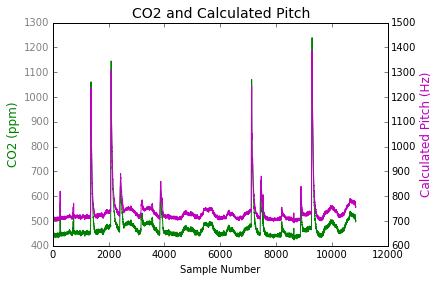

In [31]:
#want to set x-axis as date_time
#how do I format the ax2 y axis scale

def make_plot(variable_1, variable_2):
    '''Make a three variable plot with two axes'''

#plot title
    plt.title('CO2 and Calculated Pitch', fontsize='14')

#twinx layering
    ax1=plt.subplot()
    ax2=ax1.twinx()
    #ax3=ax1.twinx()

#call data for the plot
    ax1.plot(CO2_1, color='g', linewidth=1)
    ax2.plot(calc_freq, color= 'm', linewidth=1) 
    #ax3.plot(measured_freq, color = 'b', marker= 'x')

#axis labeling
    ax1.yaxis.set_tick_params(labelcolor='grey')
    ax1.set_xlabel('Sample Number')
    ax1.set_ylabel('CO2 (ppm)', fontsize=12, color = 'g')
    ax2.set_ylabel('Calculated Pitch (Hz)', fontsize=12, color='m') 
    #ax3.set_ylabel('Measured Pitch')

#axis limits
    ax1.set_ylim([400,1300])
    ax2.set_ylim([600, 1500])

    #plt.savefig('../Figures/fig1.pdf')

#Close function
    return()#'../Figures/fig1.pdf')


#Call my function to test it 
make_plot(CO2_1, calc_freq)


Here we see the relationship between CO2 concentration in parts per million and the expected changes in pitch. Measured pitch values did not match the time of sampling with that of CO2, so therefore could not be plotted. Measured pitch data would have been "ax3".

#End of script

In [ ]:
#def make_fig(datasets, variable_1, variable_2, savename):

#twinx layering
ax1=plt.subplot()
ax2=ax1.twinx()

#plot 2 variables in predertermined plot above
ax1.plot(dataset.index, variable_1, 'k-', linewidth=2)
ax2.plot(dataset.index, variable_2, )

#moving plots lines
variable_2_spine=ax2.spines['right']
variable_2_spine.set_position(('axes', 1.2))

ax1.yaxi.set_tick_params(labelcolor='k')
ax1.set_ylabel(variable_1.name, fontsize=13, colour = 'k')
ax2.sey_ylabel(variable_2.name + '($^o$C)', fontsize=13, color='grey')

#plt.savefig(savename)
return(savename)


In [ ]:
fig = plt.figure(figsize=(11,14))
plt.suptitle('')

ax1.plot(colum1, colum2, 'k-', linewidth=2)
" "

ax1.set_ylim([0,1])
ax2.set_ylim([0,1])

ax1.set_xlabel('name', fontsize=14, y=0)
ax1.set_ylabel
ax2.set_ylabel

In [ ]:
#'float' object not callable--the data in "CO2_1" are objects and cannot be called into the equation
#cramer(env.CO2_ave) 

In [ ]:
env.dtypes

In [ ]:
env.CO2_1.dtypes

In [ ]:
new = pd.Series([env.CO2_1], name = 'CO2_1')

CO2_1 = new.tolist()

CO2_array = np.array(CO2_1)

#Test type of data in "CO2_1" column
env.CO2_1.dtypes

In [ ]:
cramer(CO2_array)

In [ ]:
type(CO2_array)

In [ ]:
# To choose which CO2 value to use, I first visualize which seems normal 

#Create CO2-only dataframs
CO2 = env[['CO2_1', 'CO2_2']]

#Make a plot
CO2_fig = plt.plot(CO2)

plt.ylabel('CO2 (ppm)')
plt.xlabel('Sample number')
plt.title('Two CO2 sensors, same time and place')

#plt.savefig('CO2_fig.pdf')

In [11]:
input_file = env



#Upload environmental data file
env = pd.read_table('', sep=',')



#assigning columns names
env.columns=[['test', 'date_time','temp C', 'RH %', 'CO2_1', 'CO2_2']]

#change data time variable to actual values of time.
env['date_time']= pd.to_datetime(env['date_time'])

#test function
        #def test_cramer():
                #assert a0 + ((a9)*400)/100 + a14*((400/1000000)**2) == 672.339644669, 'Equation failure, math-mess-up'
                #return()

#Call the test function
        #test_cramer()

#pitch calculator function from Cramer equation
def cramer(data):
    '''Calculate pitch from CO2_1 concentration'''
    calc_freq = a0 + ((a9*data)/100) + a14*((data)**2)
    return(calc_freq)

#Run the function for the input column (CO2 values) to get a new column of calculated_frequency
env['calc_freq'] = cramer(env['CO2_1'])

#Import the measured pitch values--the output of pitch_data.py script
measured_freq = pd.read_table('../organ_pitch/Data/munged_pitch.csv', sep=',')

#change data time variable to actual values of time.
env['time']= pd.to_datetime(env['time'])

#Function to make and save a plot





OSError: Expected file path name or file-like object, got <class 'pandas.core.frame.DataFrame'> type